# Practicals in Seismology, winter semester 2024/25


---
#### Week 4, 13 November 2024
#### Topics: Array Analysis
#### Responsible: Dr. Yajian Gao
---
**In this week's practicals you will work with array data, learn and(or recapulate and practice**

* how to distinguish local and teleseismic earthquakes
* how to identify different phases of teleseimic earthquakes
* how to determine slowness and backazimuth of an arriving phase
* how to use array parameters to determine the earthquake source location
---

better to use seispy/2022.05 

As we have done it in the previous jupyter notebooks, we import obspy. Furthermore we import the function "read" and "UTCDateTime" from obspy.

In [1]:
#will be changed to reading in files
import obspy
from obspy import read 
from obspy import UTCDateTime 

For the analysis we will use predefined functions, which are located in the folder "scripts" and file "utils.py". Run the following cell to import those functions!

In [2]:
import sys
sys.path.append('scripts')
from utils import *

### 1) Local Earthquake
For determining slowness and backazimuth of the local earthquake, we will use the data of a seismic array close to Santiaguito volcano in 2019. Actually, the array was installed to monitor volcanic activity, but it is also sufficient to analyse local earthquakes. In this exercise we will use the data of the earthquake occuring on 8.01.19 between 20:00-21:00 UTC.
#### a) Seismogram
Read the data of station ARR1 and have a look at the dayplot. Do you find the exact time of the local event to which we were referring?

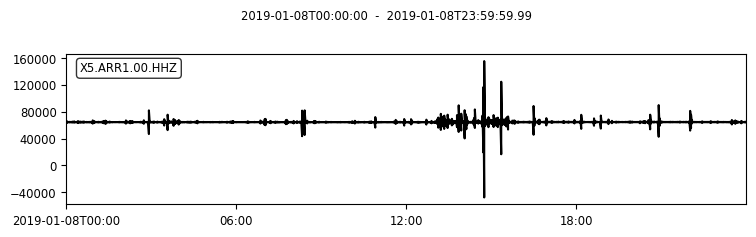

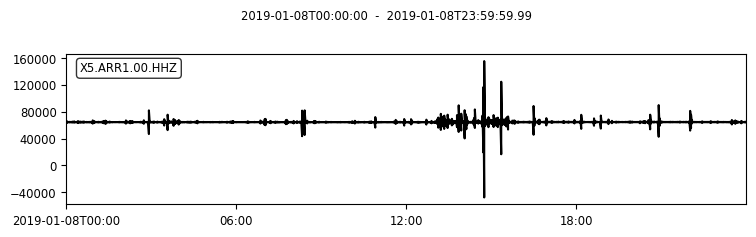

In [4]:
#read file with filepath: data/X5.ARR1.00.HHZ.D.2019.008
st=read('data/X5.ARR1.00.HHZ.D.2019.008')
# plot dayplot
st.plot()

Cut the stream in reasonable limits (e.g. 1min time window) and show a Figure of the local earthquake. Can you determine the P- and S-onset? What is the S-P traveltime?

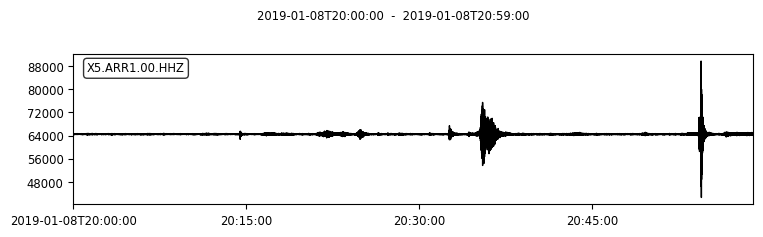

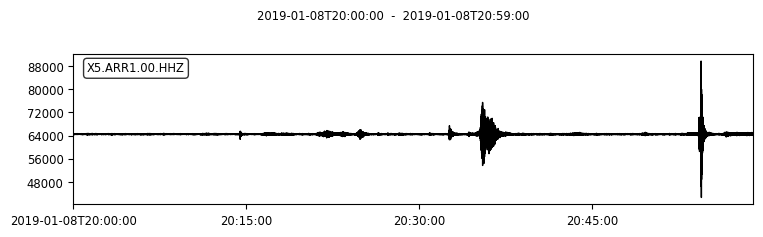

In [5]:
#copy stream
tr2=st.copy()
t1=UTCDateTime(2019,1,8,20,0,0)
t2=UTCDateTime(2019,1,8,20,59,0)
tr2.trim(t1,t2)
tr2.plot()
#define t1 and t2 with UTCDateTime and trim the data


#plot


#### b) Array Analysis
In order to determine from which direction this earthquake came from, we carry out array analysis. Therefore we have to read the data from all array stations. For the beginning, we only use the vertical component. <br>
Remember, that you can include wildcards (e.g. ? ) in the filename, to read multiple files at once.

In [6]:
#read data
st=read('data/*HZ.D.2019.008')

Cut the stream again, so it will only contain the data of the earthquake (e.g. 1min time window).

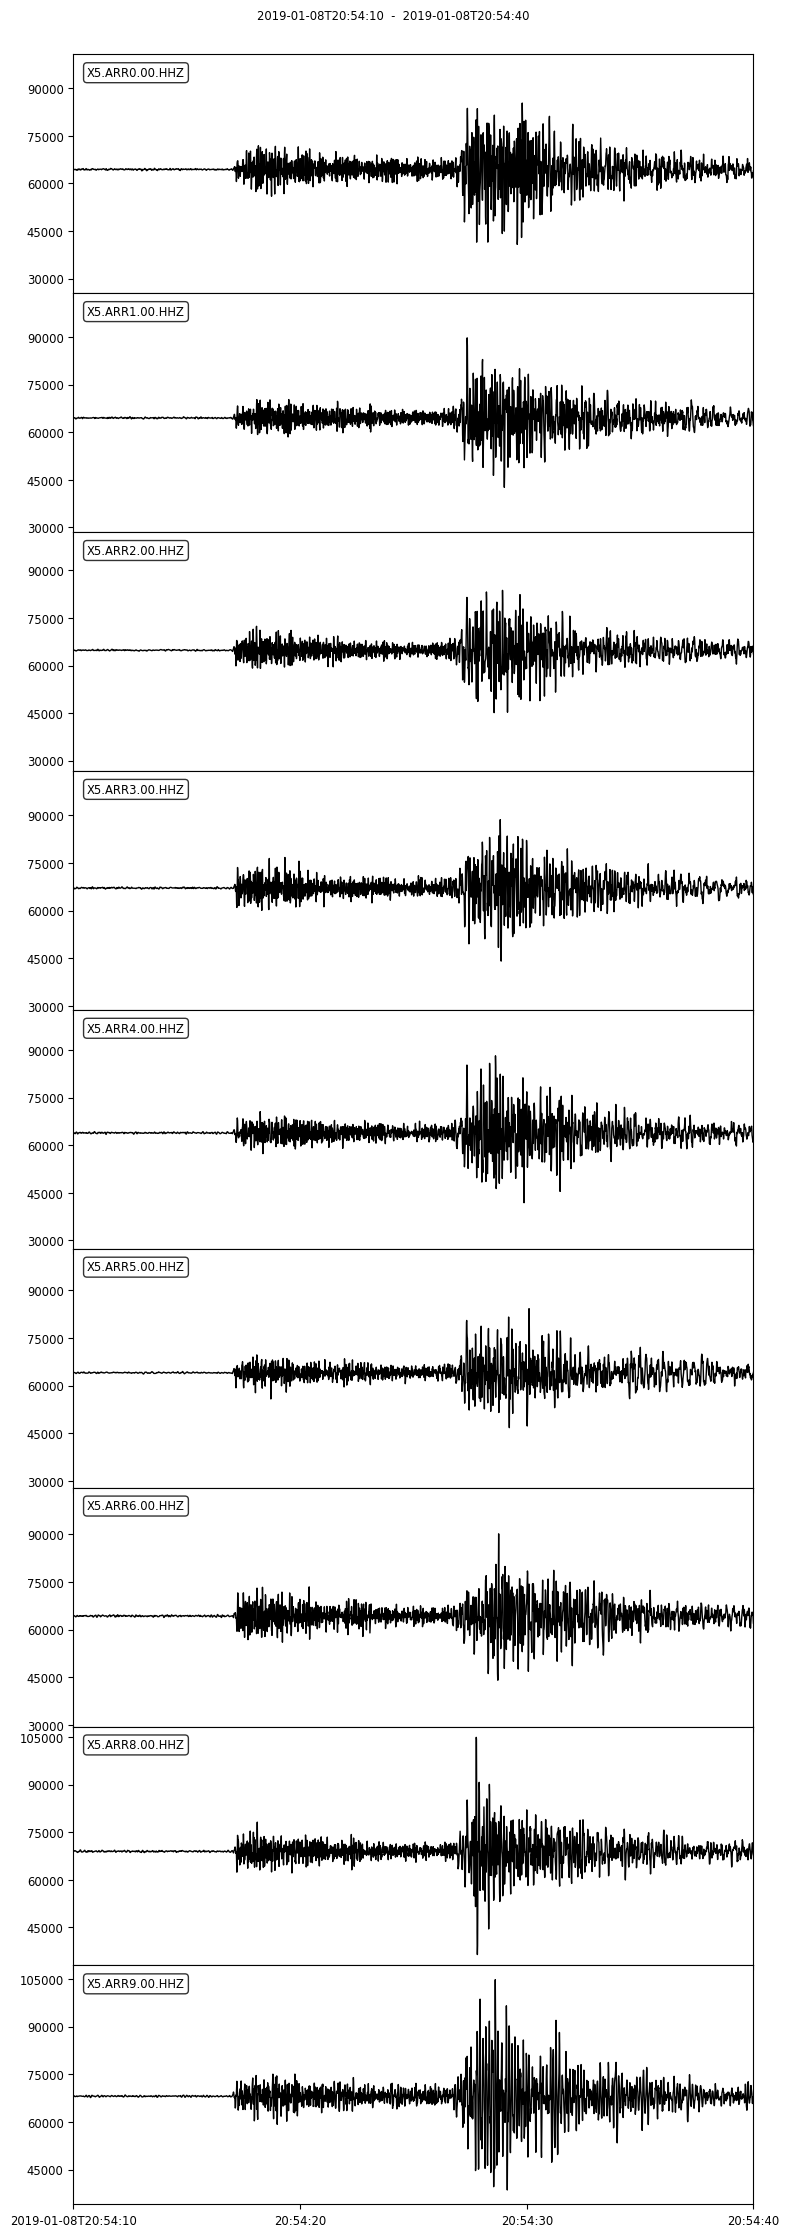

In [7]:
#copy stream
st3=st.copy()
start=UTCDateTime(2019,1,8,20,54,10)
end=UTCDateTime(2019,1,8,20,54,40)
st3.trim(start,end)
st3.plot()
#define t1 and t2 with UTCDateTime and trim the data

Plot the whole stream and check the similarities between the seismograms of the different stations.<br>
The command <code>%matplotlib qt5</code> will open the Figures in an external window. Now, you can zoom in the plot (e.g. P-wave onset).

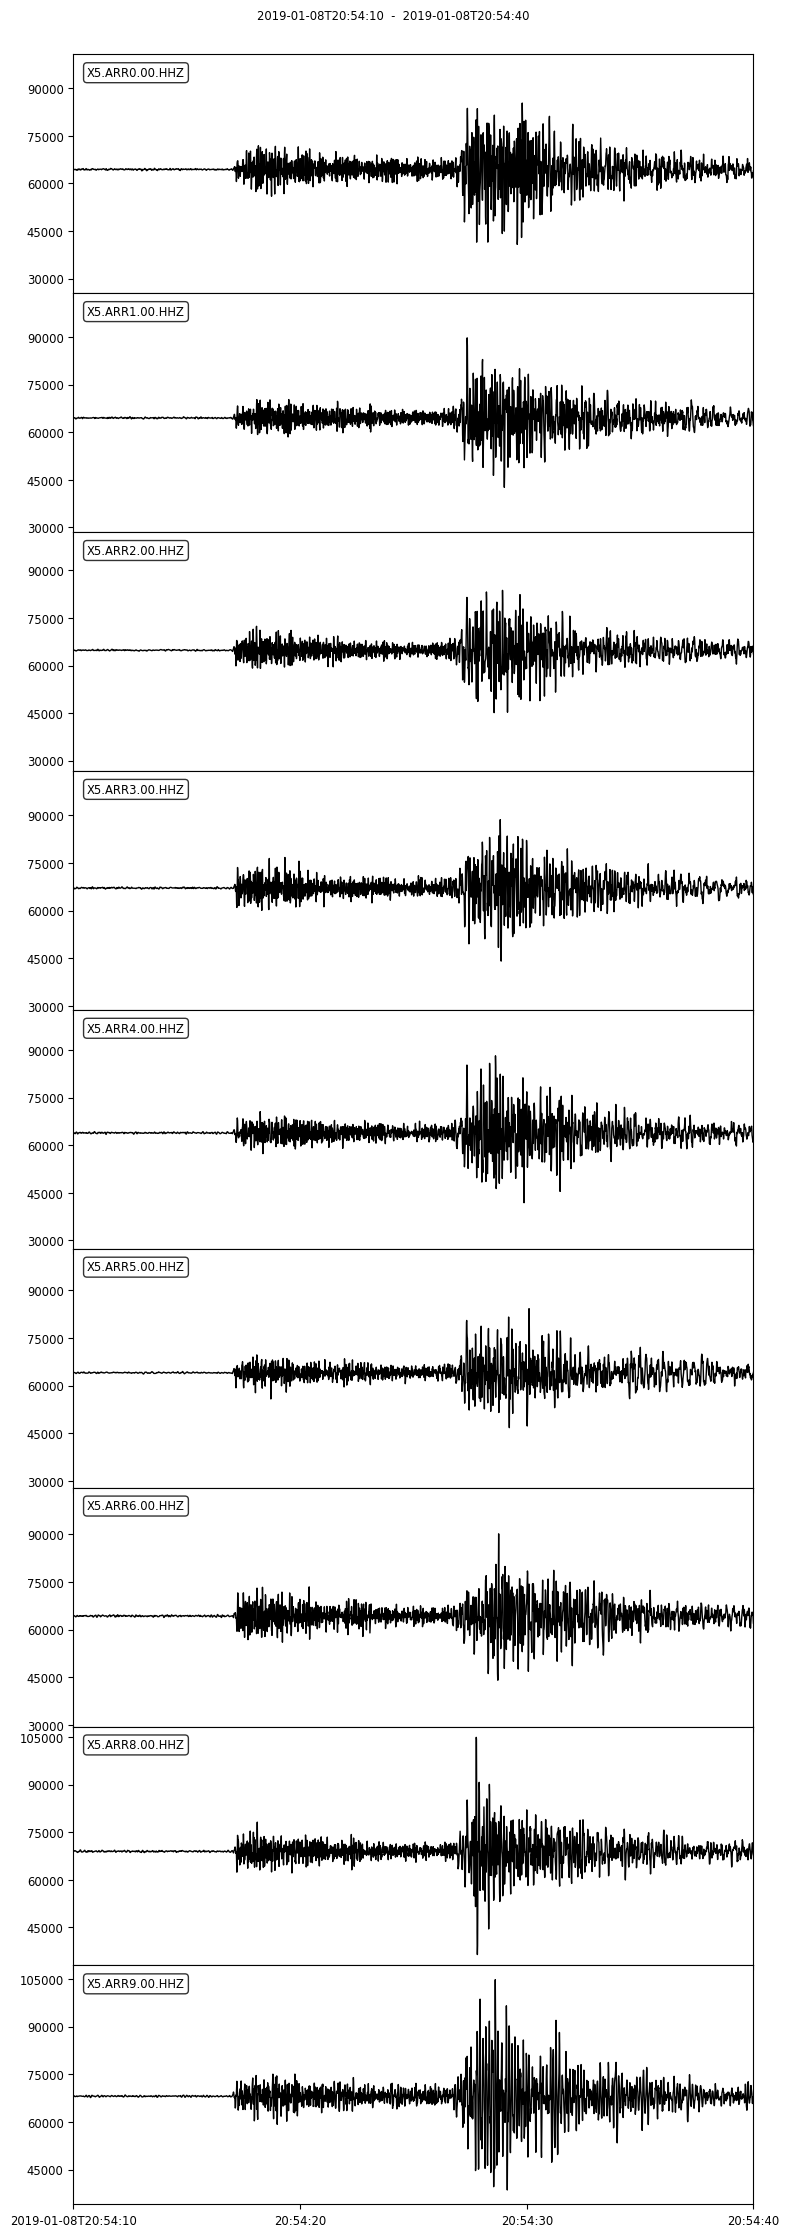

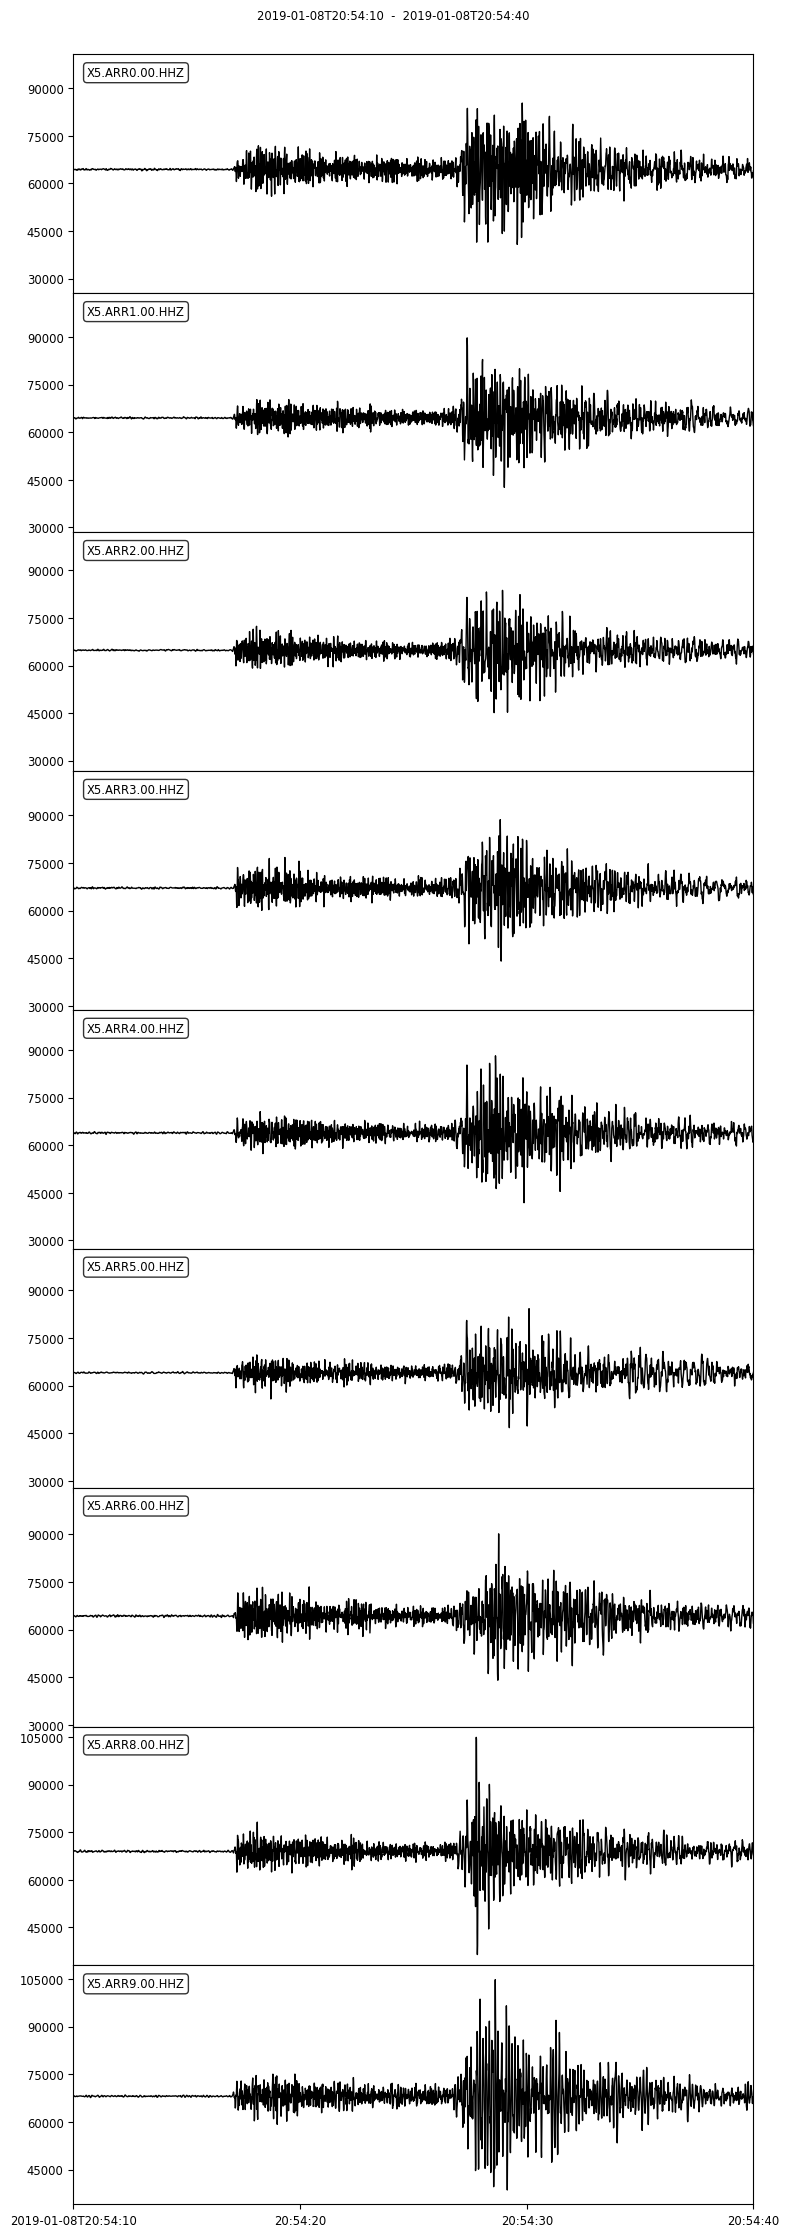

In [8]:
##%matplotlib qt5
%matplotlib inline
st3.plot()

In [13]:
st3

9 Trace(s) in Stream:
X5.ARR0.00.HHZ | 2019-01-08T20:53:00.000000Z - 2019-01-08T20:55:00.000000Z | 100.0 Hz, 12001 samples
X5.ARR1.00.HHZ | 2019-01-08T20:53:00.000000Z - 2019-01-08T20:55:00.000000Z | 100.0 Hz, 12001 samples
X5.ARR2.00.HHZ | 2019-01-08T20:53:00.000000Z - 2019-01-08T20:55:00.000000Z | 100.0 Hz, 12001 samples
X5.ARR3.00.HHZ | 2019-01-08T20:53:00.000000Z - 2019-01-08T20:55:00.000000Z | 100.0 Hz, 12001 samples
X5.ARR4.00.HHZ | 2019-01-08T20:53:00.000000Z - 2019-01-08T20:55:00.000000Z | 100.0 Hz, 12001 samples
X5.ARR5.00.HHZ | 2019-01-08T20:53:00.000000Z - 2019-01-08T20:55:00.000000Z | 100.0 Hz, 12001 samples
X5.ARR6.00.HHZ | 2019-01-08T20:53:00.000000Z - 2019-01-08T20:55:00.000000Z | 100.0 Hz, 12001 samples
X5.ARR8.00.HHZ | 2019-01-08T20:53:00.000000Z - 2019-01-08T20:55:00.000000Z | 100.0 Hz, 12001 samples
X5.ARR9.00.HHZ | 2019-01-08T20:53:00.000000Z - 2019-01-08T20:55:00.000000Z | 100.0 Hz, 12001 samples

**P-phase**<br>
We first determine the slowness and the backazimuth of the P-wave arrival.  <br>
The algorithm is based on the beamforming technique. It shifts the traces for various possible slowness and backazimuths values and stacks all traces. The closer the slowness and baz (backazimuth) are to the true values of the event, the higher is the similarity of the waveforms and the amplitudes of the stacked trace. <br>
Therefore it is important, that the chosen time window only includes the relevant phase. In this algorithm, the analysis is carried out for data in a specifing time (from <code>start</code> to <code>end</code>). Within this period, a sliding window with length <code>win_len</code> is used to calculate with beamforming the most likely parameter pair (slowness, baz) for the given data. <br>
The data is presented in a polar histogram, showing parameters which are determined more often in brighter colors.

In the following cell we have to define different parameters, which are important for the analyis.
- start   : start of time window to analyse (UTCDateTime) 
- end     : end of time window, which should only be a few (<3s for the local earthquake)  (UTCDateTime) 
- fmin    : lower frequency of filter in Hz(int/float)
- fmax    : upper frequency of filter in Hz(int/float) 
- win_len : length of sliding time window in s (int/float)
- smax    : maximal slowness value of grid search in s/km (int/float)

For a local earthquake, the total time window should not be longer than a few seconds, because it should only include the onset of the phase. Because the passband of the instruments starts at frequencies > 1Hz, lower frequencies should not be considered (e.g. 1-30Hz). 

In [9]:
start   =  UTCDateTime(2019,1,8,20,54,16.7)  #UTCDateTime
end     =  UTCDateTime(2019,1,8,20,54,17.7)
fmin    =  1
fmax    =  30
win_len =  0.5
smax    =  0.3

In [12]:
len(st3)

9

With the given parameters we can now run the array analysis. <br>
In the resulting polar plot, the angle corresponds to the backazimuth and the distance from the center to the slowness. Areas with higher color identify more parameter pairs.

-91.58299 14.74836 652529.4763330733 1630974.0327022257
-91.58299 14.74884 652529.1419205712 1631027.1359004788
-91.58382 14.7488 652439.8113423728 1631022.1480647046
-91.58217 14.74879 652617.4586258151 1631022.1604321112
-91.58295 14.74935 652533.0930166409 1631083.585171907
-91.58452 14.74809 652364.9429312277 1630943.1254309122
-91.58154 14.74793 652685.8847191362 1630927.4446292857
-91.58145 14.74938 652694.5629276978 1631087.9217154155
-91.58444 14.74969 652372.4422299421 1631120.1901788455
calculating fk-diagram with:
sll_x:  -0.3
slm_x:  0.3
sll_y:  -0.3
slm_y:  0.3
sl_s:  0.006
2019-01-08T20:54:16.700000Z 2019-01-08T20:54:17.700000Z
fk processing for signal between 2019-01-08T20:54:16.700000Z and 2019-01-08T20:54:17.700000Z...
[ 0.     0.012  0.024  0.036  0.048  0.06   0.072  0.084  0.096  0.108
  0.12   0.132  0.144  0.156  0.168  0.18   0.192  0.204  0.216  0.228
  0.24   0.252  0.264  0.276  0.288  0.3  ]
0.012


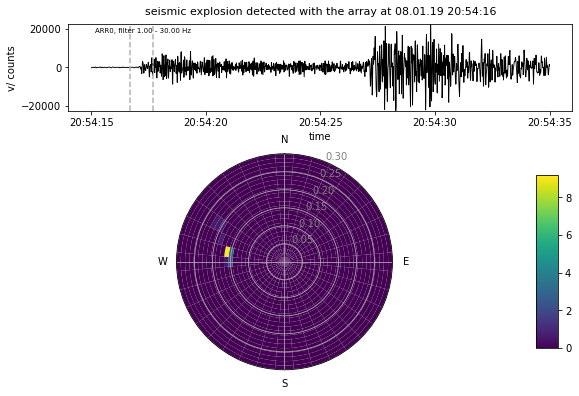

In [10]:
array_hist_st(st3,start,end,fmin=fmin, fmax=fmax,win_len=win_len,smax=smax, stationfile='station_AR.csv')   

What backazimuth and slowness values can you find for the event? You can also vary the implemented parameters (e.g. win_len, frequency band)! How do they influence the result?<br>
The array is located at 14.74836°N 91.58299°W. <br>
Check the array location on Google Maps (Satellite view) and find Santiaguito volcano in its sourrounding.
Can you confirm, that this event is most likely not a volcanic event?


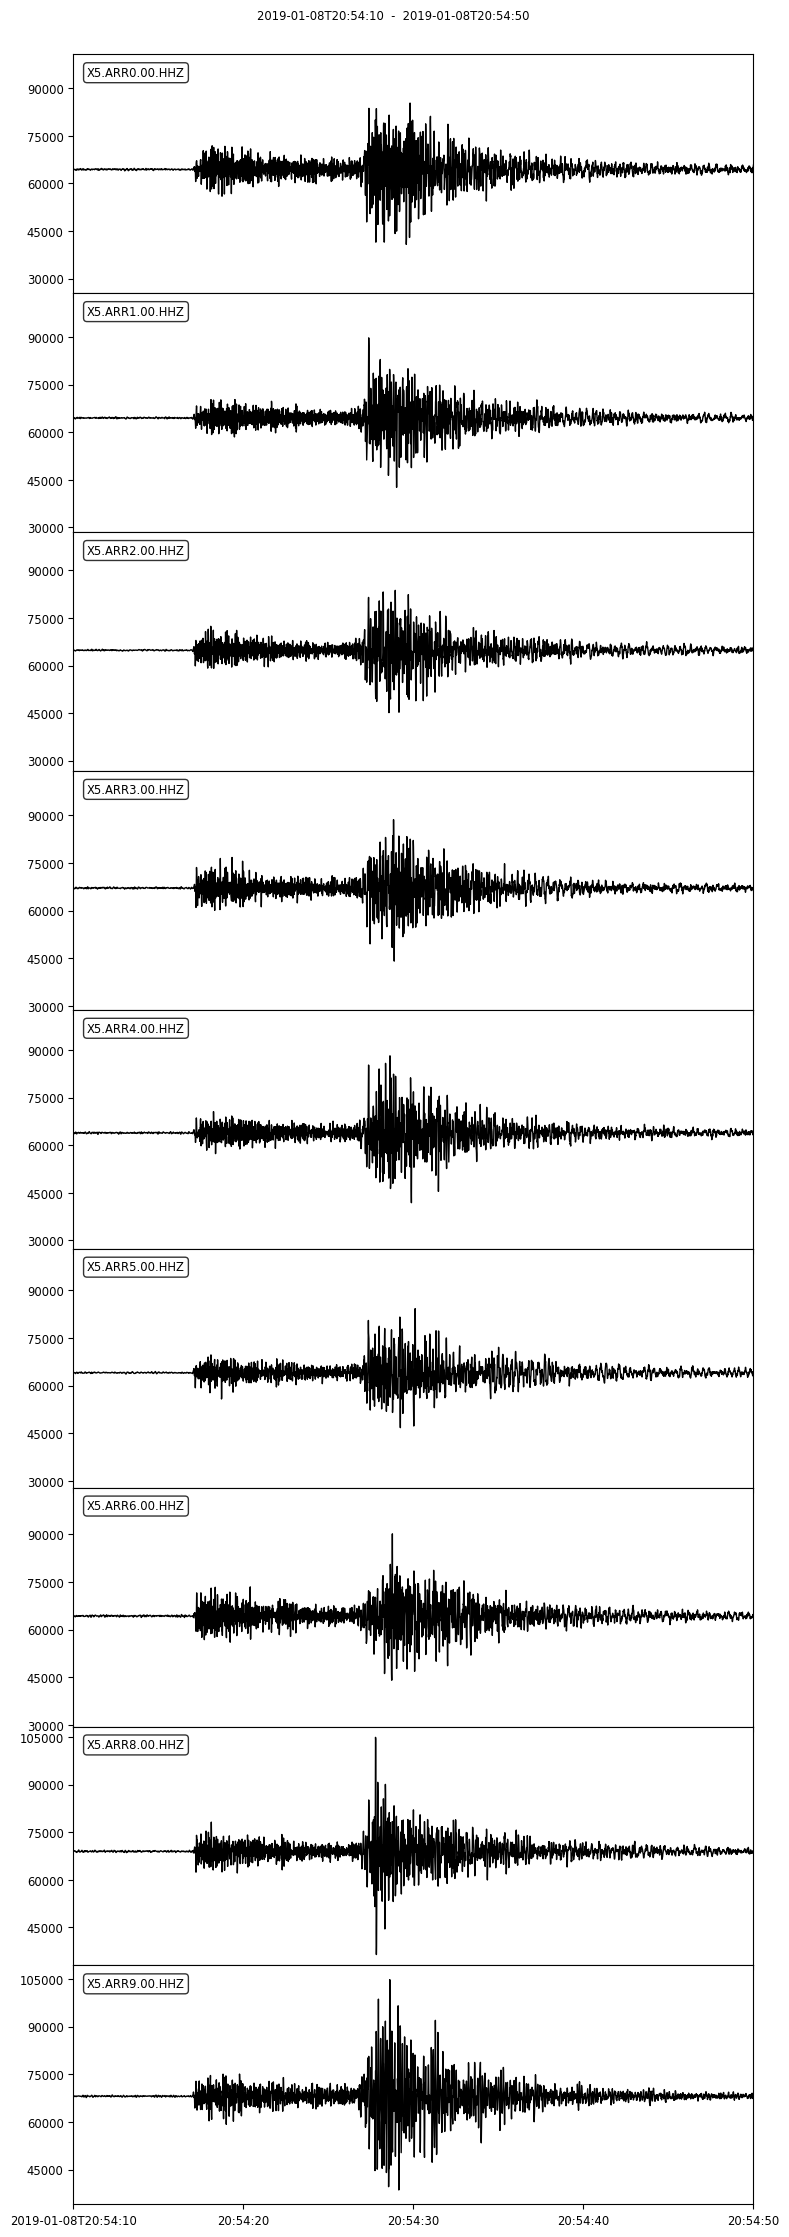

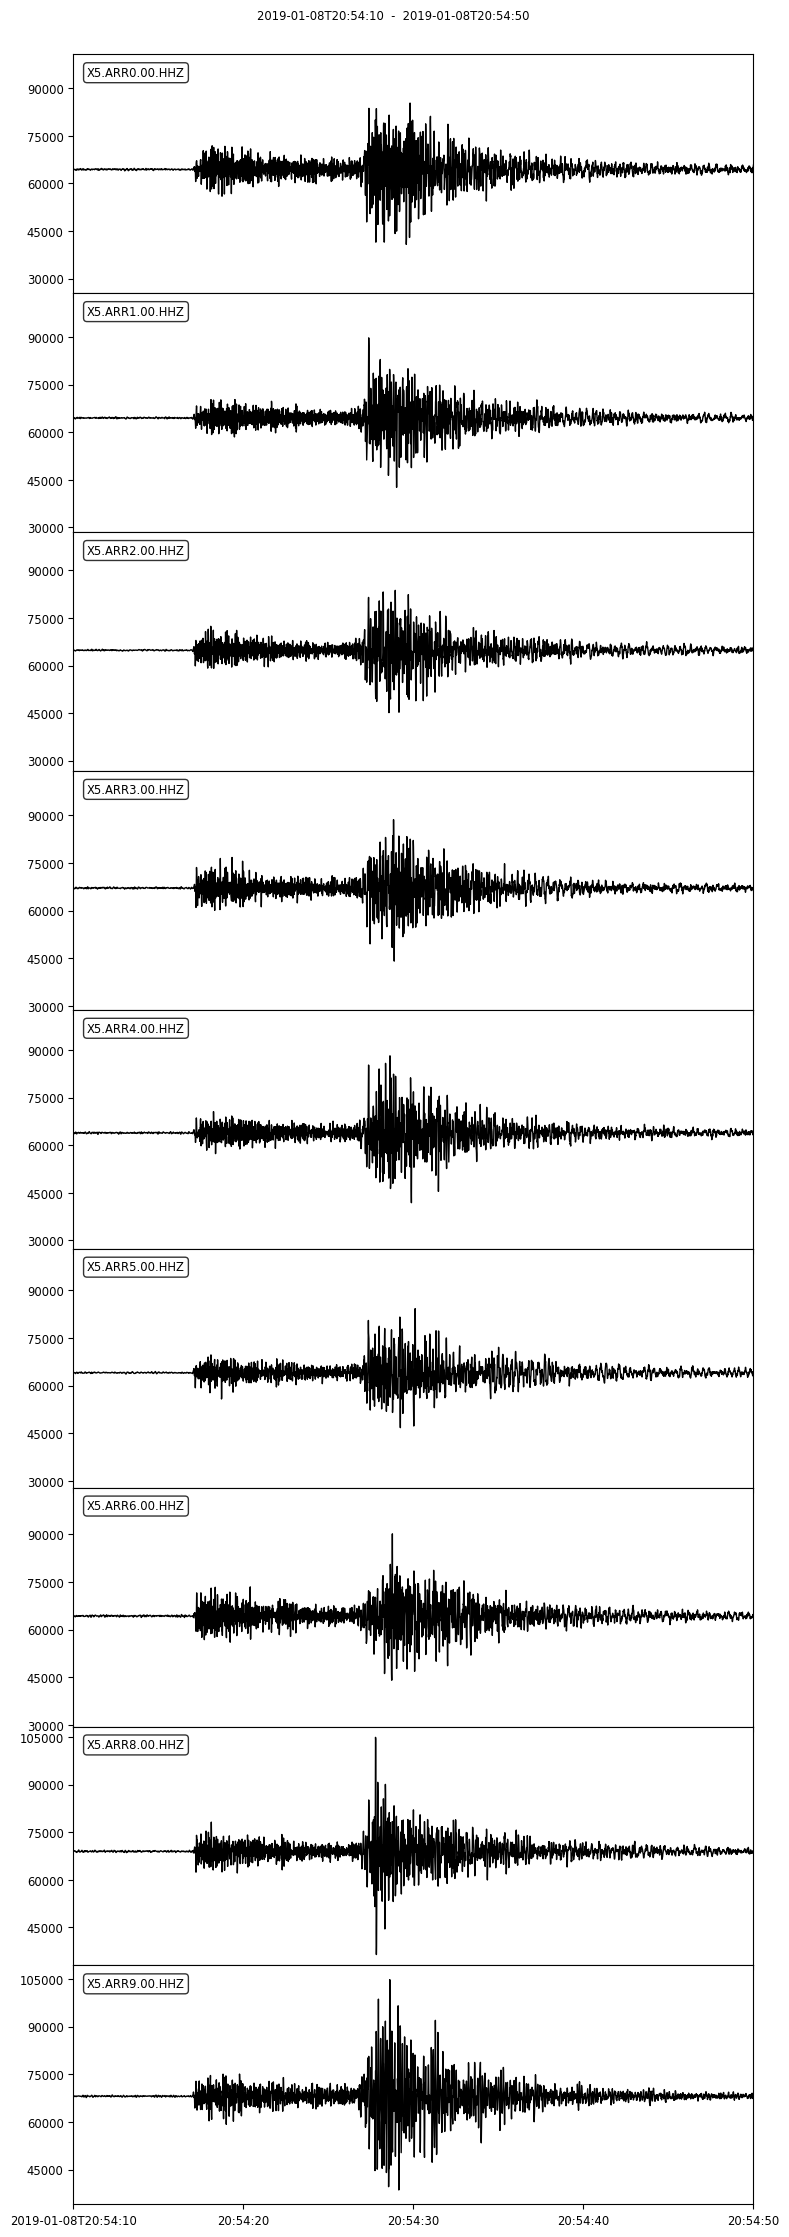

In [11]:
st3=st.copy()
t1=UTCDateTime(2019,1,8,20,54,10)
t2=UTCDateTime(2019,1,8,20,54,50)
st3.trim(t1,t2)
st3.plot()

Now you can do the same analysis for the S-wave onset!

In [12]:
#define parameters
start=UTCDateTime(2019,1,8,20,54,26.6)
end=UTCDateTime(2019,1,8,20,54,29)
fmin    =  1
fmax    =  30
win_len =   1
smax    =  0.3

#run analysis
array_hist_st(st3,start,end,fmin=fmin, fmax=fmax,win_len=win_len,smax=smax, stationfile='station_AR.csv')

-91.58299 14.74836 652529.4763330733 1630974.0327022257
-91.58299 14.74884 652529.1419205712 1631027.1359004788
-91.58382 14.7488 652439.8113423728 1631022.1480647046
-91.58217 14.74879 652617.4586258151 1631022.1604321112
-91.58295 14.74935 652533.0930166409 1631083.585171907
-91.58452 14.74809 652364.9429312277 1630943.1254309122
-91.58154 14.74793 652685.8847191362 1630927.4446292857
-91.58145 14.74938 652694.5629276978 1631087.9217154155
-91.58444 14.74969 652372.4422299421 1631120.1901788455
calculating fk-diagram with:
sll_x:  -0.3
slm_x:  0.3
sll_y:  -0.3
slm_y:  0.3
sl_s:  0.006
2019-01-08T20:54:26.600000Z 2019-01-08T20:54:29.000000Z
fk processing for signal between 2019-01-08T20:54:26.600000Z and 2019-01-08T20:54:29.000000Z...
[ 0.          0.01071429  0.02142857  0.03214286  0.04285714  0.05357143
  0.06428571  0.075       0.08571429  0.09642857  0.10714286  0.11785714
  0.12857143  0.13928571  0.15        0.16071429  0.17142857  0.18214286
  0.19285714  0.20357143  0.2142857

### 2) Teleseismic Earthquake
With the distance between earthquake and array the frequency content of the earthquake signal decreases and the wavelength increases. Therefore, the inter-station distance of the array at Santiaguito is to small to analyze teleseismic events.
With the Gräfenberg array, which is located in the south-east of Germany, we find a better suited alternative for this task.<br>
The seismic data (vertical component) for one day of all Gräfenberg stations is available in the folder "data". For the station "GRA4" the horizontal components are available too.
<img src="data/GR_array.png" alt="drawing" width="350"> <br>
(https://gfzpublic.gfz-potsdam.de/rest/items/item_4027_9/component/file_4028/content)
#### a) Seismogram
Read the data of station GR4 and have a look at the dayplot. When did the earthquake occur?

In [13]:
# read the data in files 'GR.GRA4..BHE.D.2011.070','GR.GRA4..BHN.D.2011.070','GR.GRA4..BHZ.D.2011.070' which are located in the folder 'data'
#read data
st=read('data/GR.GRA4*')

In [68]:
st

3 Trace(s) in Stream:
GR.GRA4..BHE | 2011-03-10T23:59:59.990000Z - 2011-03-11T23:59:59.990000Z | 20.0 Hz, 1728001 samples
GR.GRA4..BHN | 2011-03-10T23:59:59.990000Z - 2011-03-11T23:59:59.990000Z | 20.0 Hz, 1728001 samples
GR.GRA4..BHZ | 2011-03-10T23:59:59.990000Z - 2011-03-11T23:59:59.990000Z | 20.0 Hz, 1728001 samples

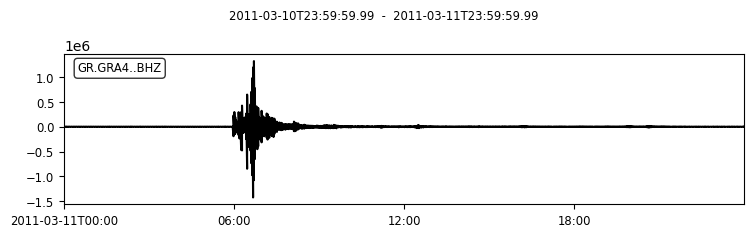

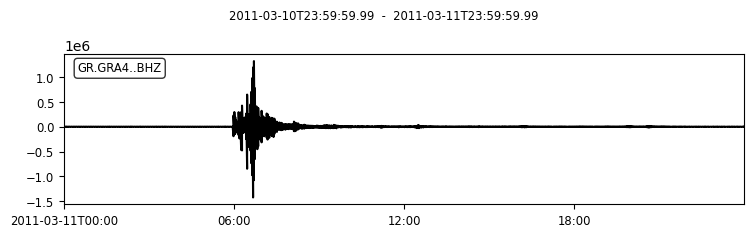

In [14]:
# plot a dayplot of one component
%matplotlib inline
st.select(component='*Z').plot()

Show a Figure with all three components of the teleseismic earthquake. The earthquake occured in a distance of 82° and a depth of 28km.<br>
Have a look at the travel time curves (e.g. https://www.usgs.gov/natural-hazards/earthquake-hazards/science/earthquake-travel-times?qt-science_center_objects=0#qt-science_center_objects or http://rses.anu.edu.au/seismology/AK135tables.pdf). <br>
Try to identify different phase arrivals! Can you identify the P-phase? Ist the S-wave visible? Do you see PP, SS?
Try to use obspy taup ray tracing module to calculte the synthetic arrivals!


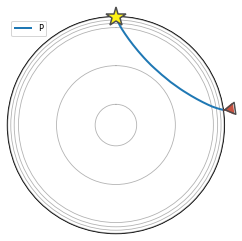

<PolarAxesSubplot:>

In [15]:
from obspy.taup import TauPyModel

model = TauPyModel(model='iasp91')
arrivals = model.get_ray_paths(28, 82, phase_list=['P'])
arrivals.plot_rays(plot_type='spherical',phase_list=['P'],
                   legend=True)

In [16]:
#copy stream
st2=st.copy()
#define t1, t2 (UTCDateTime(...))
t1=UTCDateTime(2011,3,11,5,0,0)
t2=UTCDateTime(2011,3,11,7,0,0)
st2.trim(t1,t2)
st2.plot()
#trim stream and plot it


#### b) Array Analysis
For the array analysis we have to read the data from all stations (Z-component).<br>
Remember, that you can include wildcards (e.g. ? ) in the filename, to read multiple files at once. Your stream should contain 14 traces.

In [3]:
#read array data
st=read('data/GR.*.*Z.*')

In [150]:
st

12 Trace(s) in Stream:
GR.GRA1..BHZ | 2011-03-10T23:59:59.990000Z - 2011-03-11T23:59:59.990000Z | 20.0 Hz, 1728001 samples
GR.GRA2..BHZ | 2011-03-10T23:59:59.990000Z - 2011-03-11T23:59:59.990000Z | 20.0 Hz, 1728001 samples
GR.GRA3..BHZ | 2011-03-11T00:00:00.000000Z - 2011-03-11T19:04:48.950000Z | 20.0 Hz, 1373780 samples
GR.GRA4..BHZ | 2011-03-10T23:59:59.990000Z - 2011-03-11T23:59:59.990000Z | 20.0 Hz, 1728001 samples
GR.GRB2..BHZ | 2011-03-10T23:59:59.990000Z - 2011-03-11T23:59:59.990000Z | 20.0 Hz, 1728001 samples
GR.GRB3..BHZ | 2011-03-10T23:59:59.990000Z - 2011-03-11T23:59:59.990000Z | 20.0 Hz, 1728001 samples
GR.GRB4..BHZ | 2011-03-11T18:13:35.585000Z - 2011-03-11T23:59:59.985000Z | 20.0 Hz, 415689 samples
GR.GRB5..BHZ | 2011-03-11T00:00:00.000000Z - 2011-03-12T00:00:00.000000Z | 20.0 Hz, 1728001 samples
GR.GRC1..BHZ | 2011-03-10T23:59:59.990000Z - 2011-03-11T23:59:59.990000Z | 20.0 Hz, 1728001 samples
GR.GRC2..BHZ | 2011-03-11T00:00:00.009999Z - 2011-03-11T23:59:59.959999Z | 20.

In [4]:
#%matplotlib qt5
st
st2=st.copy()

In [152]:
st2

12 Trace(s) in Stream:
GR.GRA1..BHZ | 2011-03-10T23:59:59.990000Z - 2011-03-11T23:59:59.990000Z | 20.0 Hz, 1728001 samples
GR.GRA2..BHZ | 2011-03-10T23:59:59.990000Z - 2011-03-11T23:59:59.990000Z | 20.0 Hz, 1728001 samples
GR.GRA3..BHZ | 2011-03-11T00:00:00.000000Z - 2011-03-11T19:04:48.950000Z | 20.0 Hz, 1373780 samples
GR.GRA4..BHZ | 2011-03-10T23:59:59.990000Z - 2011-03-11T23:59:59.990000Z | 20.0 Hz, 1728001 samples
GR.GRB2..BHZ | 2011-03-10T23:59:59.990000Z - 2011-03-11T23:59:59.990000Z | 20.0 Hz, 1728001 samples
GR.GRB3..BHZ | 2011-03-10T23:59:59.990000Z - 2011-03-11T23:59:59.990000Z | 20.0 Hz, 1728001 samples
GR.GRB4..BHZ | 2011-03-11T18:13:35.585000Z - 2011-03-11T23:59:59.985000Z | 20.0 Hz, 415689 samples
GR.GRB5..BHZ | 2011-03-11T00:00:00.000000Z - 2011-03-12T00:00:00.000000Z | 20.0 Hz, 1728001 samples
GR.GRC1..BHZ | 2011-03-10T23:59:59.990000Z - 2011-03-11T23:59:59.990000Z | 20.0 Hz, 1728001 samples
GR.GRC2..BHZ | 2011-03-11T00:00:00.009999Z - 2011-03-11T23:59:59.959999Z | 20.

**First onset** <br>
Now, copy the stream and trim it to the first onset (e.g. 2min time window). 

In [5]:
st2

12 Trace(s) in Stream:
GR.GRA1..BHZ | 2011-03-10T23:59:59.990000Z - 2011-03-11T23:59:59.990000Z | 20.0 Hz, 1728001 samples
GR.GRA2..BHZ | 2011-03-10T23:59:59.990000Z - 2011-03-11T23:59:59.990000Z | 20.0 Hz, 1728001 samples
GR.GRA3..BHZ | 2011-03-11T00:00:00.000000Z - 2011-03-11T19:04:48.950000Z | 20.0 Hz, 1373780 samples
GR.GRA4..BHZ | 2011-03-10T23:59:59.990000Z - 2011-03-11T23:59:59.990000Z | 20.0 Hz, 1728001 samples
GR.GRB2..BHZ | 2011-03-10T23:59:59.990000Z - 2011-03-11T23:59:59.990000Z | 20.0 Hz, 1728001 samples
GR.GRB3..BHZ | 2011-03-10T23:59:59.990000Z - 2011-03-11T23:59:59.990000Z | 20.0 Hz, 1728001 samples
GR.GRB4..BHZ | 2011-03-11T18:13:35.585000Z - 2011-03-11T23:59:59.985000Z | 20.0 Hz, 415689 samples
GR.GRB5..BHZ | 2011-03-11T00:00:00.000000Z - 2011-03-12T00:00:00.000000Z | 20.0 Hz, 1728001 samples
GR.GRC1..BHZ | 2011-03-10T23:59:59.990000Z - 2011-03-11T23:59:59.990000Z | 20.0 Hz, 1728001 samples
GR.GRC2..BHZ | 2011-03-11T00:00:00.009999Z - 2011-03-11T23:59:59.959999Z | 20.

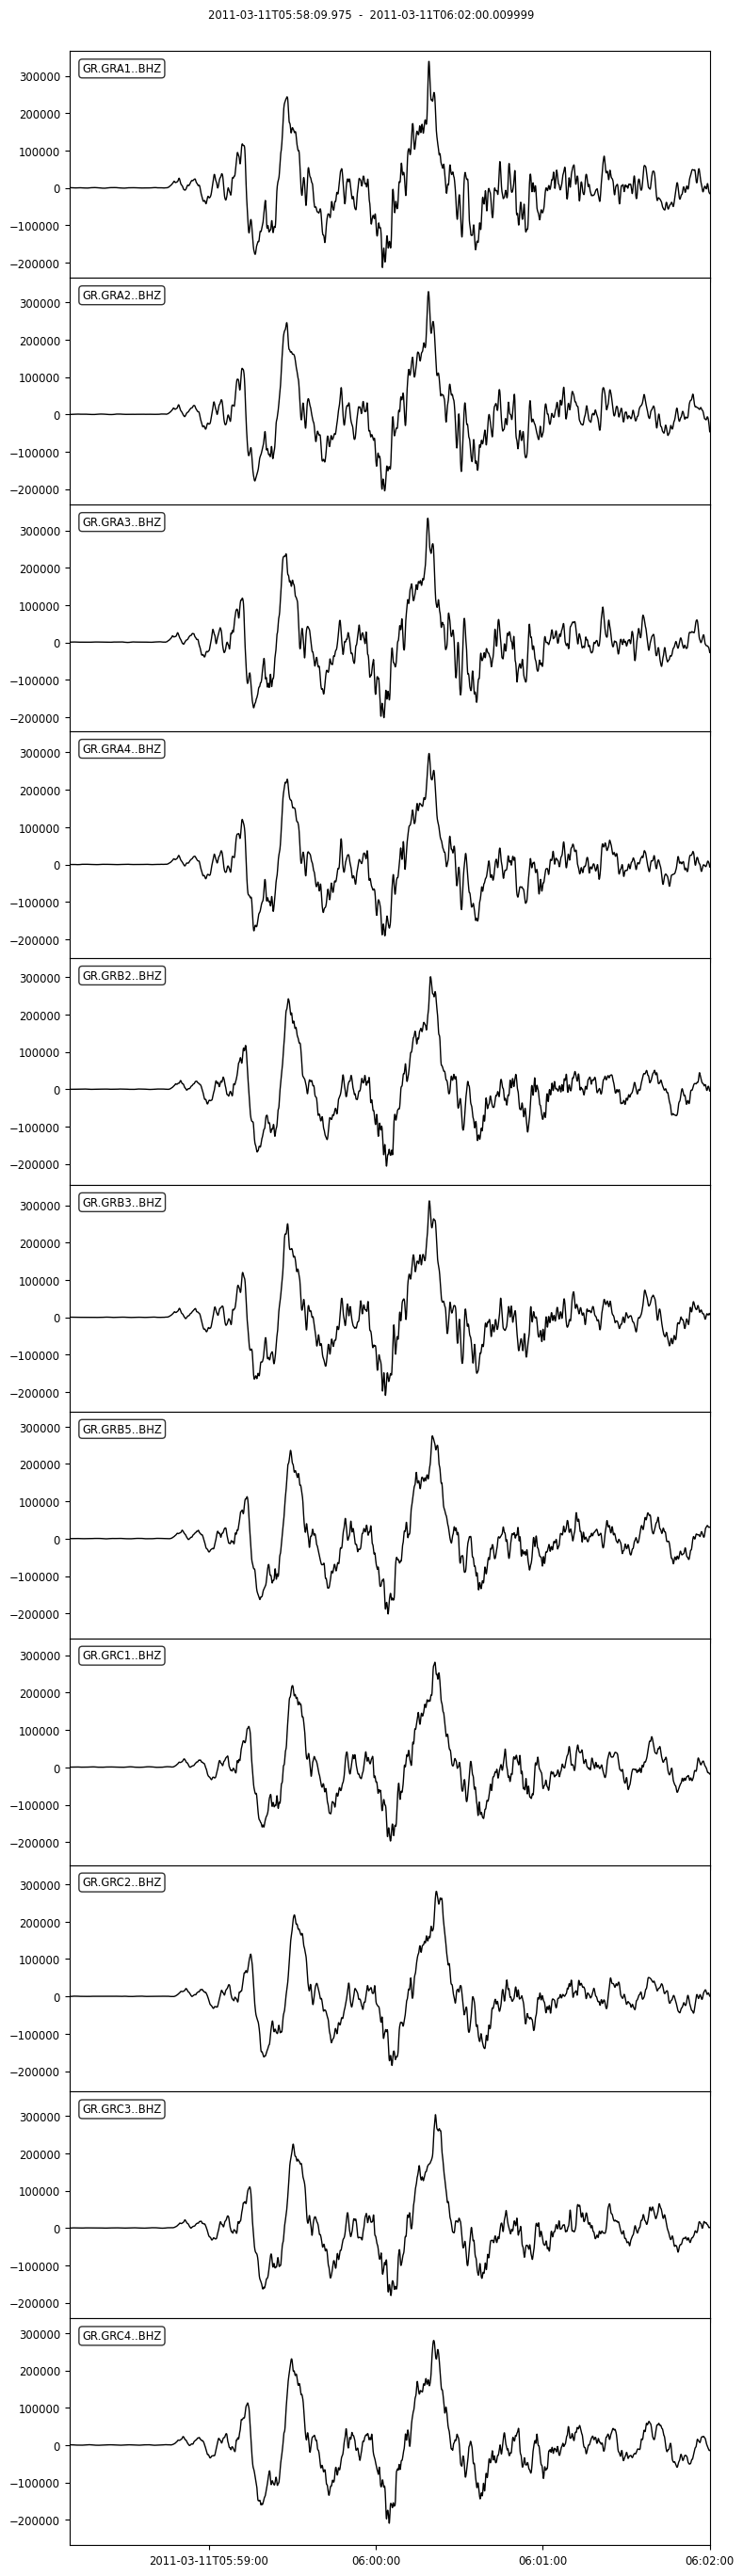

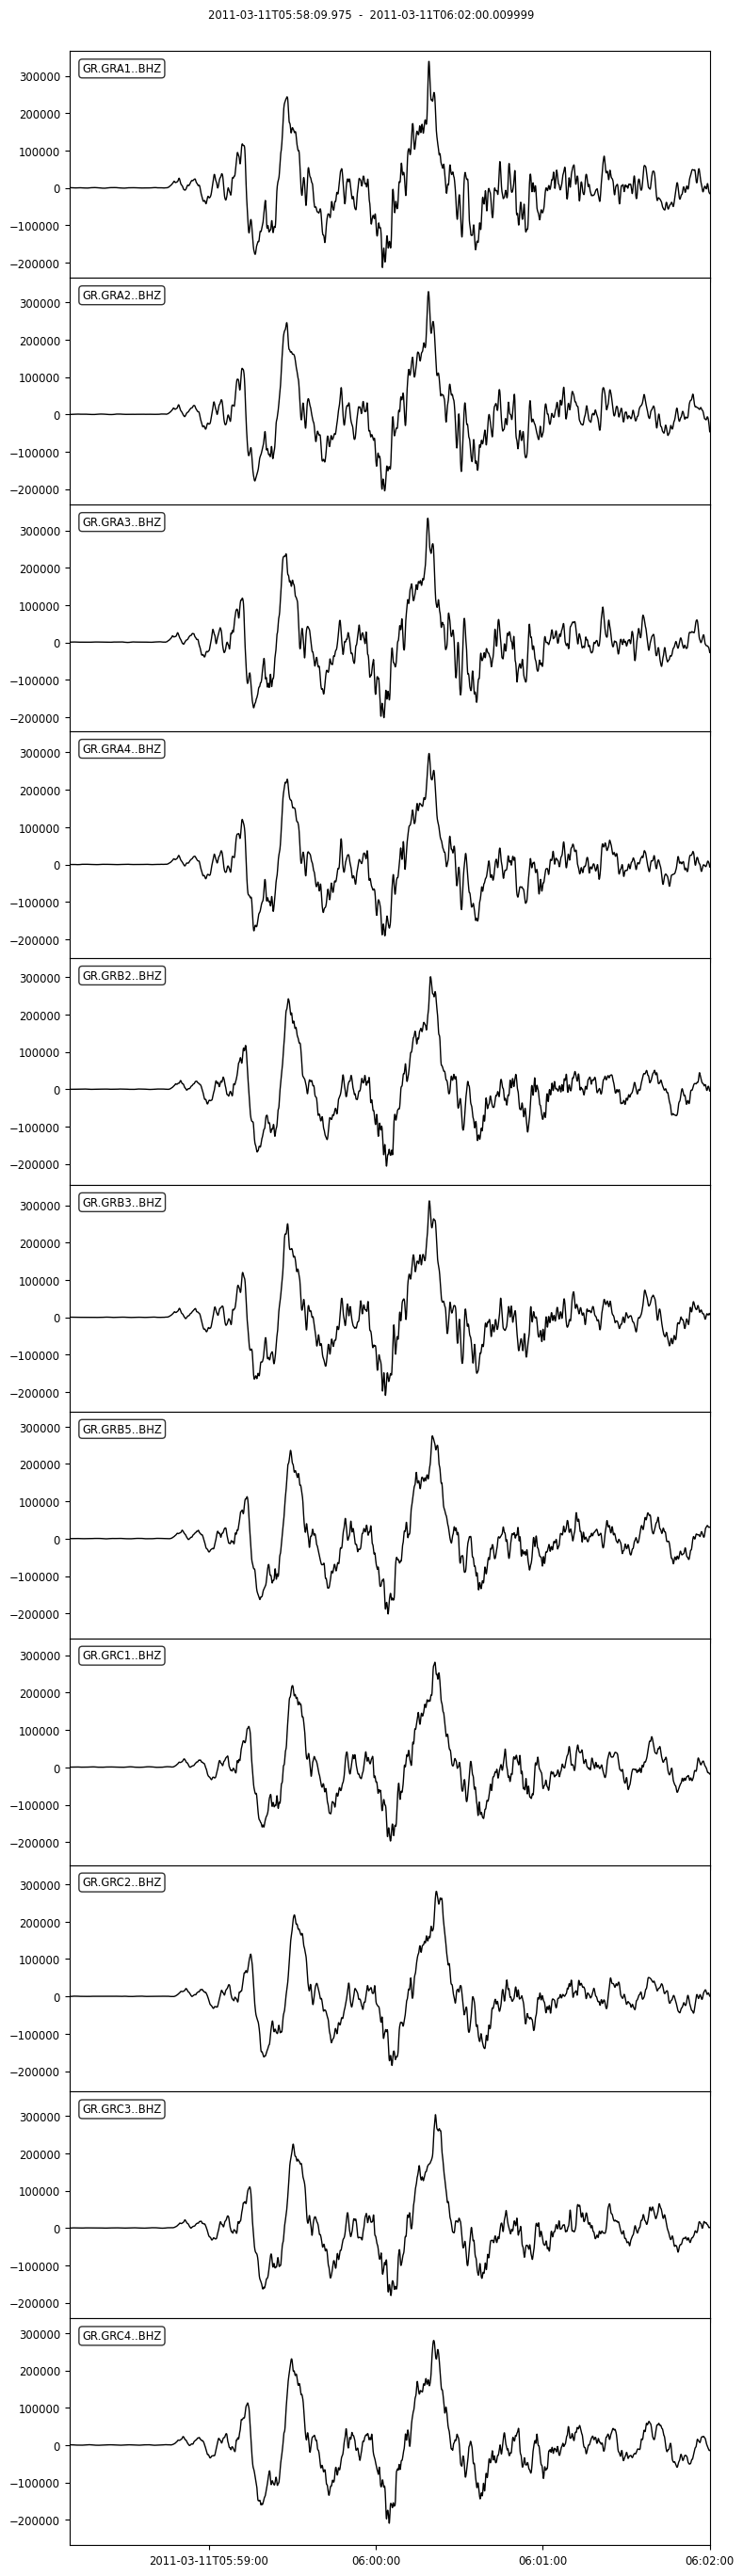

In [6]:
#copy stream and trim it
%matplotlib inline
st2=st.copy()
t1=UTCDateTime(2011,3,11,5,58,10)
t2=UTCDateTime(2011,3,11,6,2,0)
st2.trim(t1,t2)
st2.plot()

We have to define the parameters for the array analysis again. Because the frequency of the teleseimic is significatly lower than the frequency of a local earthquakes we have to vary the variables below.
- choose a lower frequency band (e.g. 2-100s)
- increase the size of the sliding window (e.g. 10s) and the total time window (eg. 20s)
- the incoming phases are faster and approaching with a lower incident angle. Therefore the slowness is lower and we should decrease the maximal slowness (e.g. 0.1 s/km)


In [7]:
start   = UTCDateTime(2011,3,11,5,58,40)  #UTCDateTime
end     = UTCDateTime(2011,3,11,6,0,40)
fmin    = 0.01   
fmax    = 0.5
win_len = 100
smax    = 0.1

Run the array analysis and determine the slowness and the backazimuth for the P-wave. Check how different parameters influence the results!

11.22172 49.691888 227527.25950073567 5511229.808689186
11.359444 49.655208 237259.3338764707 5506662.197709685
11.318695 49.762204 234902.70978353382 5518697.266108767
11.435871 49.565403 242300.42893962516 5496416.428604476
11.669966 49.270925 257776.87606171003 5462910.918350936
11.805983 49.343542 268010.553849424 5470554.710820525
11.676733 49.112131 257493.3419252073 5445240.595387806
11.52135 48.996168 245564.87098029375 5432862.088470162
11.375543 48.867567 234219.67486889294 5419069.634001675
11.585822 48.890174 249749.75533965477 5420867.9344028
11.526272 49.086746 246386.2840944405 5442912.189634295
calculating fk-diagram with:
sll_x:  -0.1
slm_x:  0.1
sll_y:  -0.1
slm_y:  0.1
sl_s:  0.002
2011-03-11T05:58:39.990000Z 2011-03-11T06:00:39.990000Z
fk processing for signal between 2011-03-11T05:58:39.990000Z and 2011-03-11T06:00:39.990000Z...
[0.    0.025 0.05  0.075 0.1  ]
0.025


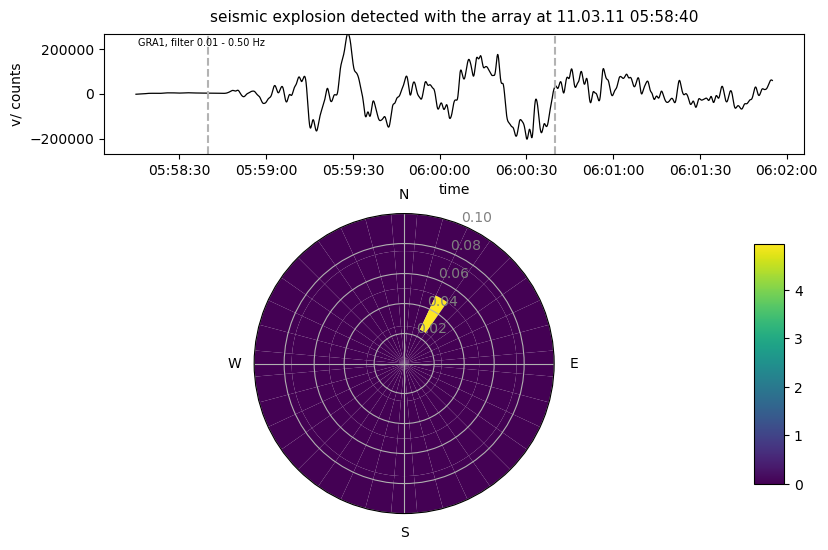

In [8]:
array_hist_st(st2,start,end,fmin=fmin,fmax=fmax,win_len=win_len,smax=smax,stationfile='station_GR.csv')

In [9]:
from pyproj import Geod
import numpy as np
def circle(geod, lon, lat, radius, n_samples=360):
    """
    Return the coordinates of a geodetic circle of a given
    radius about a lon/lat point.

    Radius is in meters in the geodetic's coordinate system.

    """
    lons, lats, back_azim = geod.fwd(np.repeat(lon, n_samples),
                                     np.repeat(lat, n_samples),
                                     np.linspace(360, 0, n_samples),
                                     np.repeat(radius, n_samples),
                                     radians=False)
    return lons, lats



    

In [10]:
geod = Geod(ellps='WGS84')
lon1,lat1=circle(geod, 11.22172,49.691888, 81*111*1000, n_samples=10)
lon2,lat2=circle(geod, 11.22172,49.691888, 83*111*1000, n_samples=10)

In [4]:
lon1

array([-168.77828   , -115.35605566,  -80.2807465 ,  -49.44725495,
        -11.40101866,   33.84445866,   71.89069495,  102.7241865 ,
        137.79949566, -168.77828   ])

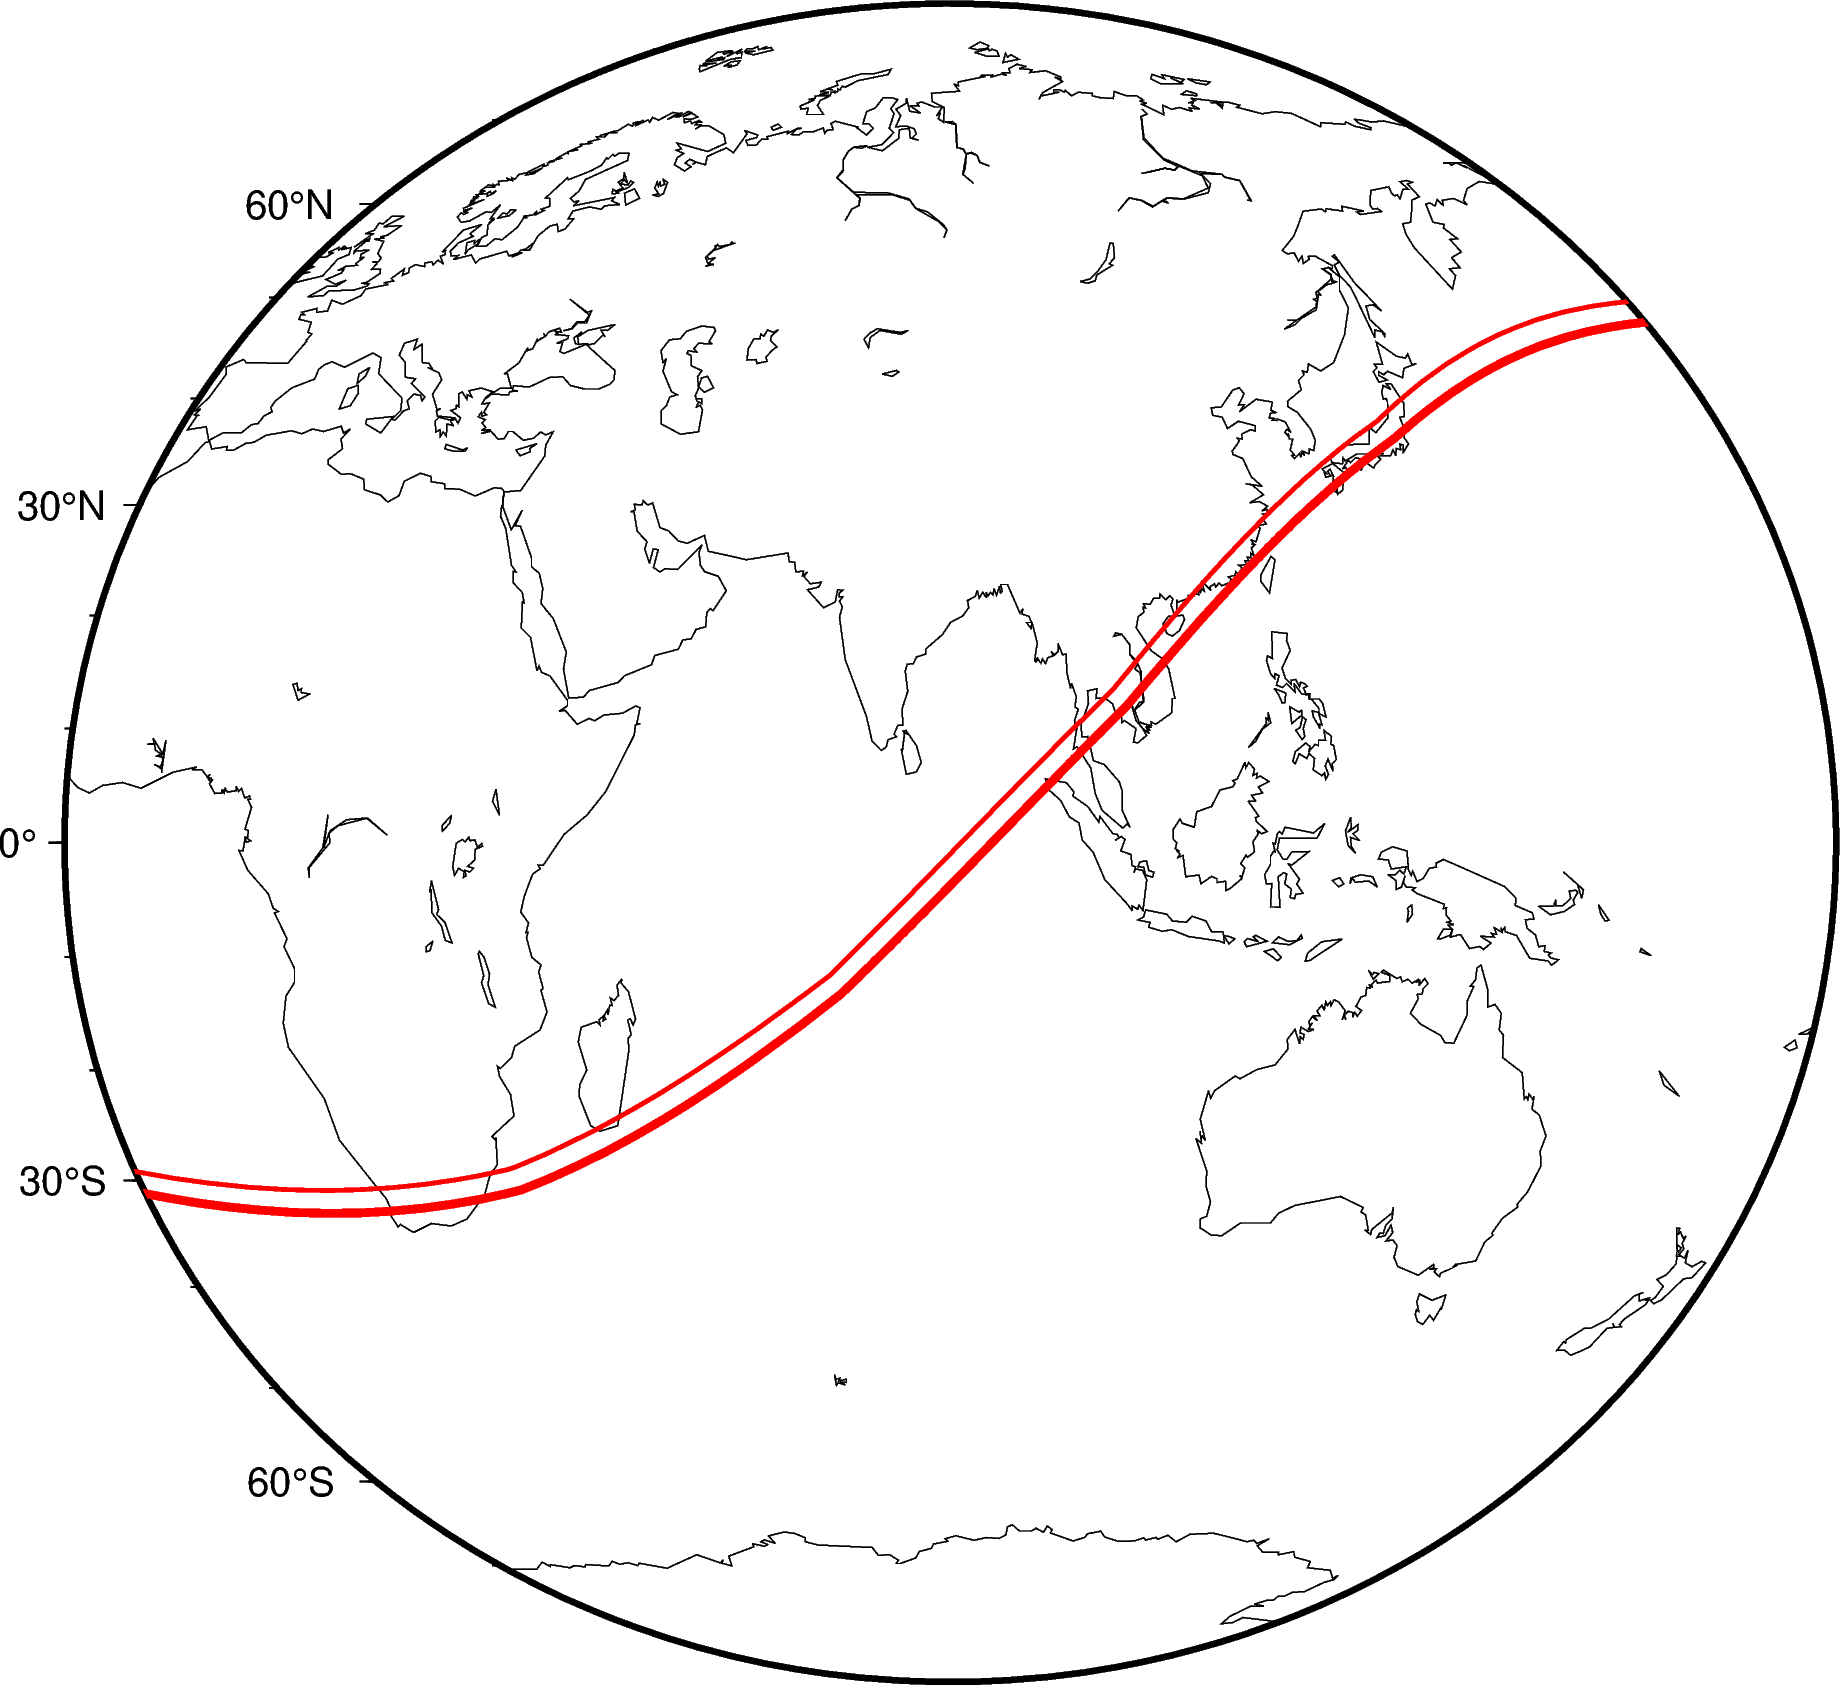

In [11]:
import pygmt
###be careful seispy/2022.05 only works for this function
fig = pygmt.Figure()
points1 = pygmt.project(center=[ 11.22172,49.691888], azimuth=30, generate=10,length=[0,90])
points2 = pygmt.project(center=[ 11.22172,49.691888], azimuth=45, generate=10,length=[0,90])

# create a plot with coast and Mercator projection (M)
fig.basemap(region=[-10,180, -90, 90], projection='W15c', frame=True)
fig.coast(shorelines=True, area_thresh=5000)

# plot individual points of first great circle as seagreen line
fig.plot(x=lon1, y=lat1, pen="1p,red")
fig.plot(x=lon2, y=lat2, pen="2p,red")
#fig.plot(x=points2.r, y=points2.s, pen="2p,seagreen")
fig.show()

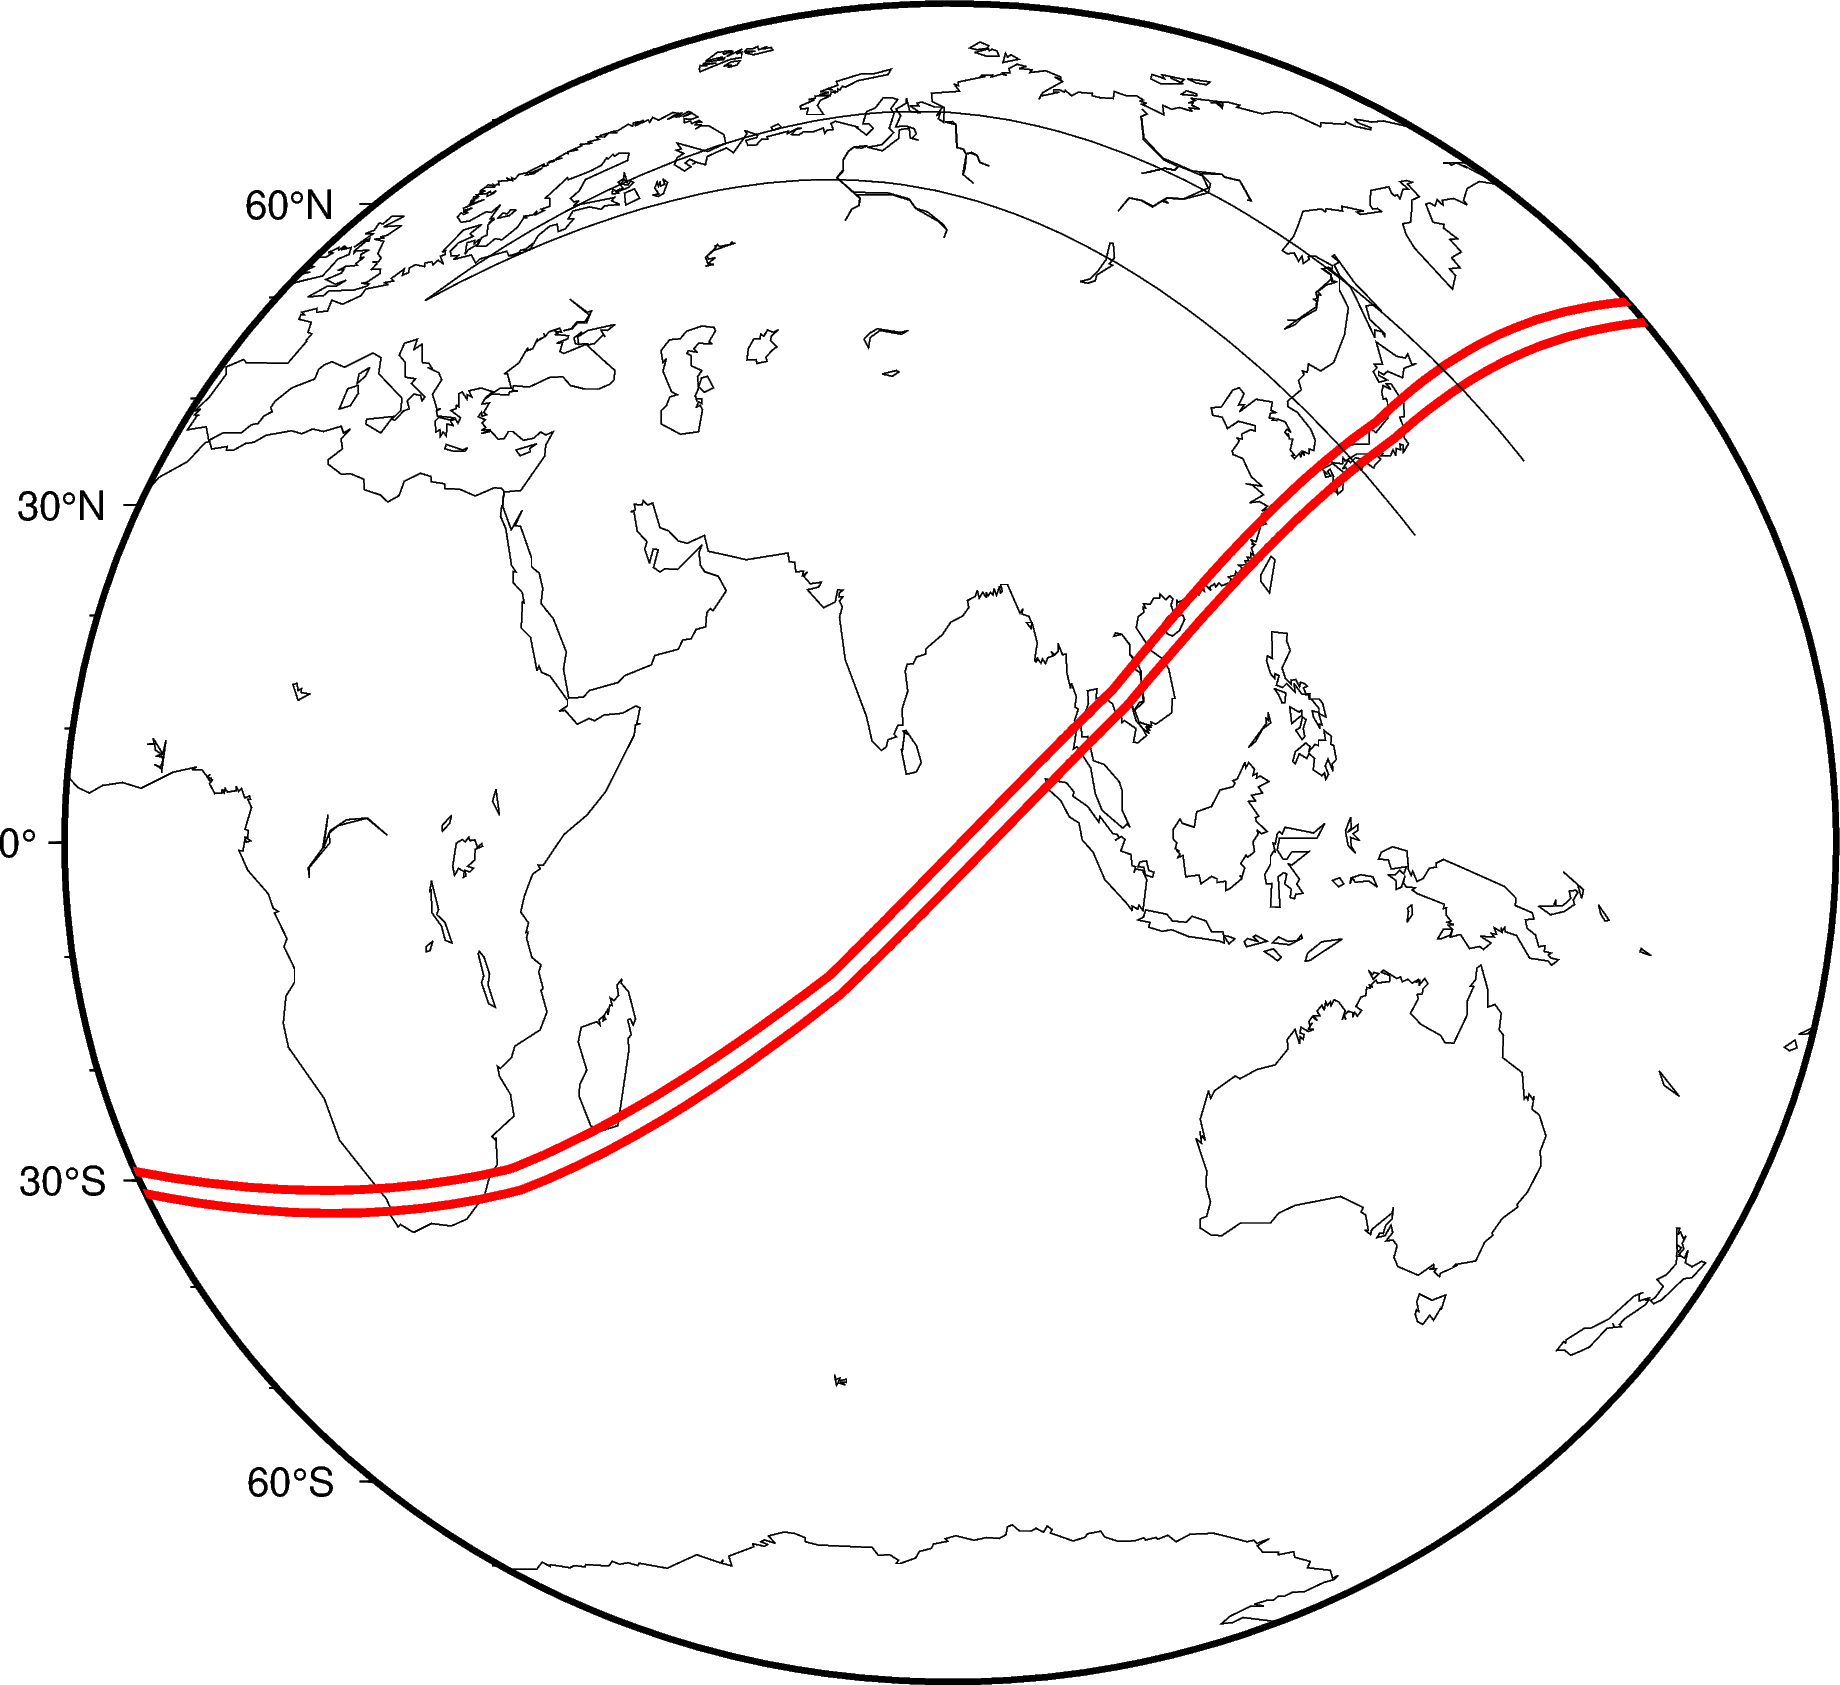

In [12]:
import pygmt
fig = pygmt.Figure()
azi_min=30
azi_max=45
points1 = pygmt.project(center=[ 11.22172,49.691888], azimuth=azi_min, generate=10,length=[0,90])
points2 = pygmt.project(center=[ 11.22172,49.691888], azimuth=azi_max, generate=10,length=[0,90])

# create a plot with coast and Mercator projection (M)
fig.basemap(region=[-10,180, -90, 90], projection='W15c', frame=True)
fig.coast(shorelines=True, area_thresh=5000)
fig.plot(x=lon1, y=lat1, pen="2p,red")
fig.plot(x=lon2, y=lat2, pen="2p,red")
# plot individual points of first great circle as seagreen line
fig.plot(x=points1.r, y=points1.s)
fig.plot(x=points2.r, y=points2.s)
fig.show()

In [ ]:
2011-03-11 05:46:23 

By knowing the distance (82°) and the direction (backazimuth) of the earthquake you can estimate the source location with a map (or better a globe). Remember, 1° is appoximal equal to 111km.<br>
Can you find out, where the earthquake happend?

**Reflected S-wave** <br>
Now, carry out the same analysis for the reflected S-wave (SS-phase). Think about the velocity and the raypath and connected incident angle of the SS-phase. Will the slowness be higher or lower than the slowness of the P-phase?<br>You can use the table below, to find out, when the SS-phase should arrive and then try to find it in the seismogram.
<img src="data/travel_time.png" alt="drawing" width="550"> <br>
(Table is taking from: http://rses.anu.edu.au/seismology/AK135tables.pdf)

In [394]:
22*60+37.13

1357.13

(-2.0, 15.0)

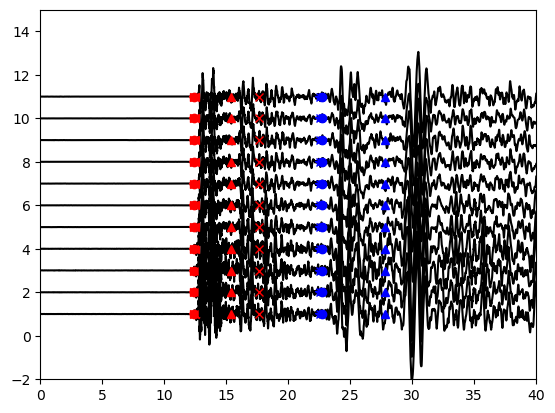

In [14]:
#copy stream and trim it
#2011-03-11 05:46:23 
%matplotlib inline
from obspy.taup import TauPyModel
st3=st.copy()
t1=UTCDateTime(2011,3,11,5,45,24)
t2=UTCDateTime(2011,3,11,6,45,24)
st3.trim(t1,t2)
model = TauPyModel(model='ak135')
arrivals = model.get_ray_paths(29, 82, phase_list=['P'])
time_p=arrivals[0].time

arrivals = model.get_ray_paths(29, 82, phase_list=['pP'])
time_pP=arrivals[0].time


arrivals = model.get_ray_paths(29, 82, phase_list=['sP'])
time_sP=arrivals[0].time

arrivals = model.get_ray_paths(29, 82, phase_list=['PcP'])
time_pcp=arrivals[0].time

arrivals = model.get_ray_paths(29, 82, phase_list=['PP'])
time_pp=arrivals[0].time

arrivals = model.get_ray_paths(29, 82, phase_list=['PKiKP'])
time_pkikp=arrivals[0].time


arrivals = model.get_ray_paths(29, 82, phase_list=['S'])
time_s=arrivals[0].time
arrivals = model.get_ray_paths(29, 82, phase_list=['SS'])
time_ss=arrivals[0].time
arrivals = model.get_ray_paths(29, 82, phase_list=['ScS'])
time_scs=arrivals[0].time
arrivals = model.get_ray_paths(29, 82, phase_list=['SKS'])
time_sks=arrivals[0].time


import matplotlib.pyplot as plt
i=1.0
for tr in st3:
    time=tr.times()-60
    plt.plot(time/60,10*tr.data/tr.data.max()+i,'k')
    plt.plot(time_p/60,i,'r*')
    plt.plot(time_sP/60,i,'r<')
    plt.plot(time_pP/60,i,'r>')
    plt.plot(time_pkikp/60,i,'rx')
    plt.plot(time_pcp/60,i,'ro')
    plt.plot(time_pp/60,i,'r^')
    plt.plot(time_s/60,i,'b*')
    plt.plot(time_sks/60,i,'bx')
    plt.plot(time_scs/60,i,'bo')
    plt.plot(time_ss/60,i,'b^')

    i+=1.0
plt.xlim(0,40)
plt.ylim(-2,15)

In [15]:
arrivals = model.get_ray_paths(29, 82)


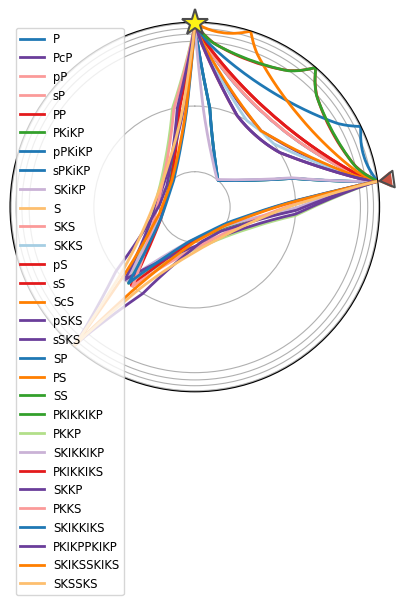

<PolarAxesSubplot:>

In [16]:
arrivals.plot_rays(legend=True)

Cut a time window of 2-5min, which includes the onset of the SS-phase.

In [18]:
arrivals = model.get_ray_paths(29, 82, phase_list=['SS'])
SS_time=arrivals[0].time

In [164]:
SS_time/60

27.80938208452552

In [19]:
#copy and trim stream
st4=st.copy()
t1=UTCDateTime(2011,3,11,5,45,24)
t2=t1+SS_time+480
st4.trim(t1,t2)

11 Trace(s) in Stream:
GR.GRA1..BHZ | 2011-03-11T05:45:23.990000Z - 2011-03-11T06:21:12.540000Z | 20.0 Hz, 42972 samples
GR.GRA2..BHZ | 2011-03-11T05:45:23.990000Z - 2011-03-11T06:21:12.540000Z | 20.0 Hz, 42972 samples
GR.GRA3..BHZ | 2011-03-11T05:45:24.000000Z - 2011-03-11T06:21:12.550000Z | 20.0 Hz, 42972 samples
GR.GRA4..BHZ | 2011-03-11T05:45:23.990000Z - 2011-03-11T06:21:12.540000Z | 20.0 Hz, 42972 samples
GR.GRB2..BHZ | 2011-03-11T05:45:23.990000Z - 2011-03-11T06:21:12.540000Z | 20.0 Hz, 42972 samples
GR.GRB3..BHZ | 2011-03-11T05:45:23.990000Z - 2011-03-11T06:21:12.540000Z | 20.0 Hz, 42972 samples
GR.GRB5..BHZ | 2011-03-11T05:45:24.000000Z - 2011-03-11T06:21:12.550000Z | 20.0 Hz, 42972 samples
GR.GRC1..BHZ | 2011-03-11T05:45:23.990000Z - 2011-03-11T06:21:12.540000Z | 20.0 Hz, 42972 samples
GR.GRC2..BHZ | 2011-03-11T05:45:24.009999Z - 2011-03-11T06:21:12.559999Z | 20.0 Hz, 42972 samples
GR.GRC3..BHZ | 2011-03-11T05:45:23.989999Z - 2011-03-11T06:21:12.539999Z | 20.0 Hz, 42972 sampl

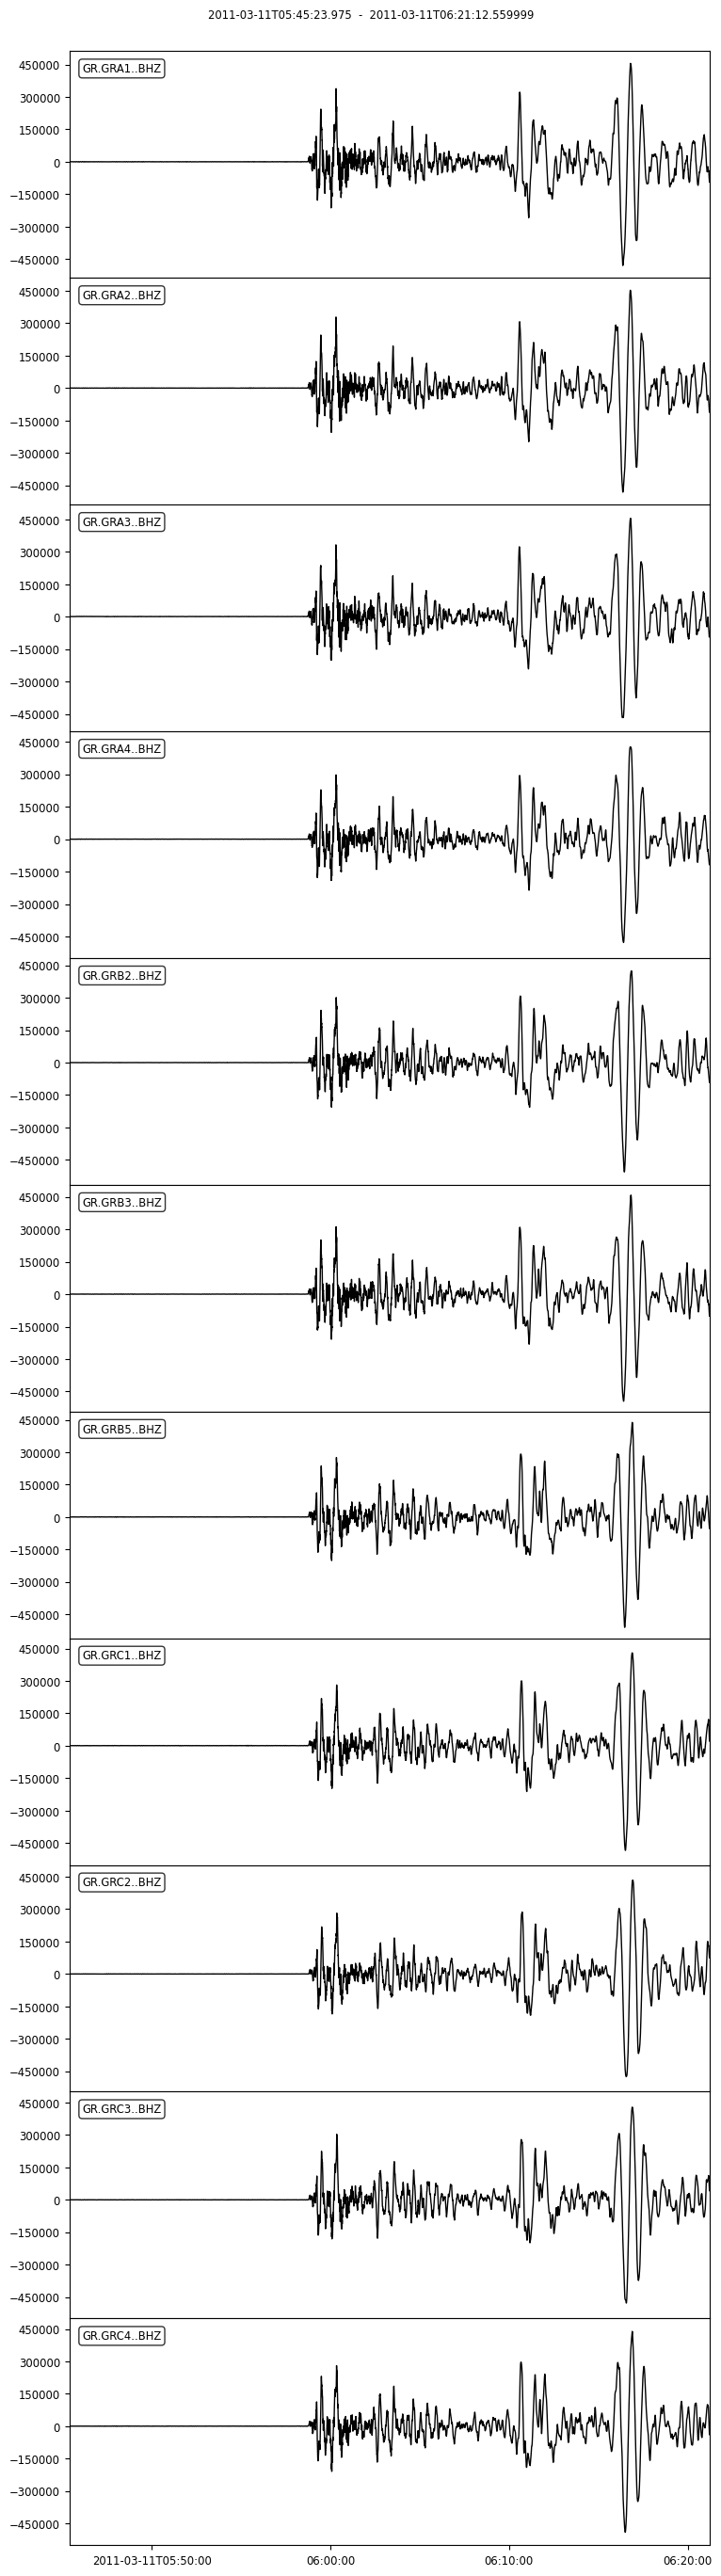

In [20]:
st4.plot()

Define the parameters of the array analysis. You have to adjust the parameters (start, end, win_len, smax) again. 

(20.0, 30.0)

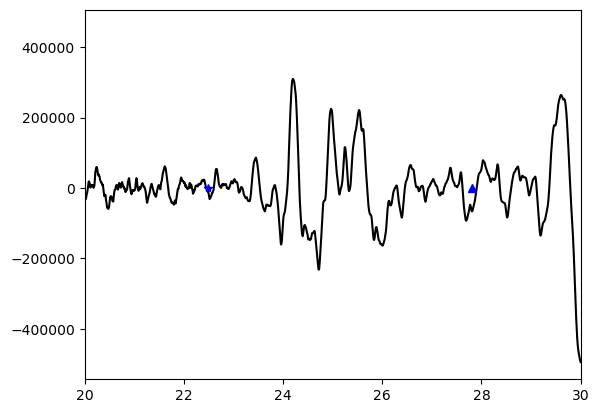

In [21]:
#copy stream and trim it
#2011-03-11 05:46:23 
%matplotlib inline

model = TauPyModel(model='ak135')
arrivals = model.get_ray_paths(29, 82, phase_list=['P'])
time_p=arrivals[0].time

arrivals = model.get_ray_paths(29, 82, phase_list=['pP'])
time_pP=arrivals[0].time


arrivals = model.get_ray_paths(29, 82, phase_list=['sP'])
time_sP=arrivals[0].time

arrivals = model.get_ray_paths(29, 82, phase_list=['PcP'])
time_pcp=arrivals[0].time

arrivals = model.get_ray_paths(29, 82, phase_list=['PP'])
time_pp=arrivals[0].time

arrivals = model.get_ray_paths(29, 82, phase_list=['PKiKP'])
time_pkikp=arrivals[0].time


arrivals = model.get_ray_paths(29, 82, phase_list=['S'])
time_s=arrivals[0].time
arrivals = model.get_ray_paths(29, 82, phase_list=['SS'])
time_ss=arrivals[0].time
arrivals = model.get_ray_paths(29, 82, phase_list=['ScS'])
time_scs=arrivals[0].time
arrivals = model.get_ray_paths(29, 82, phase_list=['SKS'])
time_sks=arrivals[0].time


import matplotlib.pyplot as plt
i=0
tr=st4[5]
time=tr.times()-60
plt.plot(time/60,tr.data,'k')
plt.plot(time_p/60,i,'r*')
plt.plot(time_sP/60,i,'r<')
plt.plot(time_pP/60,i,'r>')
plt.plot(time_pkikp/60,i,'rx')
plt.plot(time_pcp/60,i,'ro')
plt.plot(time_pp/60,i,'r^')
plt.plot(time_s/60,i,'b*')
#plt.plot(time_sks/60,i,'bx')
#plt.plot(time_scs/60,i,'bo')
plt.plot(time_ss/60,i,'b^')
plt.xlim(20,30)
#plt.ylim(-2,15)

In [522]:
SS_time/60

27.809382051874667

In [22]:
start   = UTCDateTime(2011,3,11,5,46,24)+SS_time #UTCDateTime
end     = UTCDateTime(2011,3,11,5,46,24)+SS_time+180  #UTCDateTime  
fmin    = 0.01
fmax    =  0.5
win_len =  100
smax    =  14.88/111 # do you expect higher or lower slowness values than for the P-phase?

Run the array analysis!

11.22172 49.691888 227527.25950073567 5511229.808689186
11.359444 49.655208 237259.3338764707 5506662.197709685
11.318695 49.762204 234902.70978353382 5518697.266108767
11.435871 49.565403 242300.42893962516 5496416.428604476
11.669966 49.270925 257776.87606171003 5462910.918350936
11.805983 49.343542 268010.553849424 5470554.710820525
11.676733 49.112131 257493.3419252073 5445240.595387806
11.52135 48.996168 245564.87098029375 5432862.088470162
11.375543 48.867567 234219.67486889294 5419069.634001675
11.585822 48.890174 249749.75533965477 5420867.9344028
11.526272 49.086746 246386.2840944405 5442912.189634295
calculating fk-diagram with:
sll_x:  -0.13405405405405407
slm_x:  0.13405405405405407
sll_y:  -0.13405405405405407
slm_y:  0.13405405405405407
sl_s:  0.0026810810810810816
2011-03-11T06:14:12.540000Z 2011-03-11T06:17:12.540000Z
fk processing for signal between 2011-03-11T06:14:12.540000Z and 2011-03-11T06:17:12.540000Z...
[0.         0.00837838 0.01675676 0.02513514 0.03351351 0.

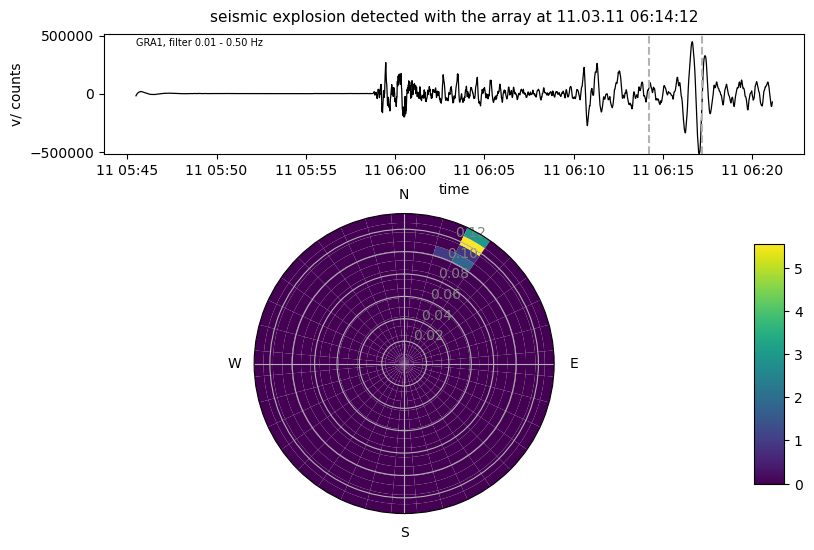

In [23]:
array_hist_st(st4,start,end,fmin=fmin, fmax=fmax,win_len=win_len,smax=smax, stationfile='station_GR.csv')

Compare the slowness and backazimuth of the P-phase and the SS-phase. Do the results confirm your considerations from before? <br>
In the table with the travel times there is an additional column with the expected slowenss in s/°. Convert those values to s/km and compare them with your results.

**Bonus:** <br>
Can you identify an additional phase and determine slowness and backazimuth?
    